# Single Predictor Variable Logistic Regressions

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas
import numpy
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [4]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [5]:
data = loan_approval_lib.load_original_data()

# Data Cleaning

In [6]:
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file'
]

for column in columns:
    row_count_1 = len(data)

    if column == 'person_age':
        data = data[data['person_age'] <= 100]

    if column == 'person_emp_length':
        data = data[data['person_emp_length'] <= 100]

    data = data[data[column].isna() == False]
    
    row_count_2 = len(data)
    row_count_diff = row_count_1 - row_count_2
    print(f'column {column}, number of removed rows: {row_count_diff}')
    

column person_age, number of removed rows: 5
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 897
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 3047
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0


# Perform Logistic Regression for all Numerical Columns

## Person Age

20 90
70


/tmp/ipykernel_1392/121838873.py:16: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


clf score: 0.7833892148644873


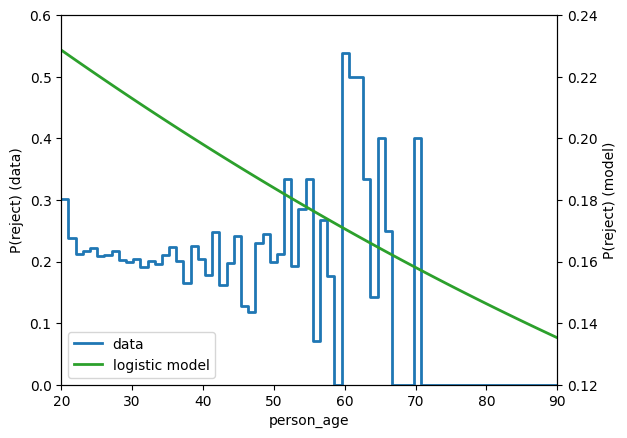

In [42]:
column = 'person_age'

data_accept = data[data['loan_status'] == 0]
data_reject = data[data['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
_max = 90
print(_min, _max)
_steps = _max - _min
print(_steps)

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 0.6)

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.12, 0.24)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='lower left')
plt.savefig(f'logistic_{column}.pdf')
None

### Person Income

0 600000.0
50


/tmp/ipykernel_1392/1345570540.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


clf score: 0.7833892148644873


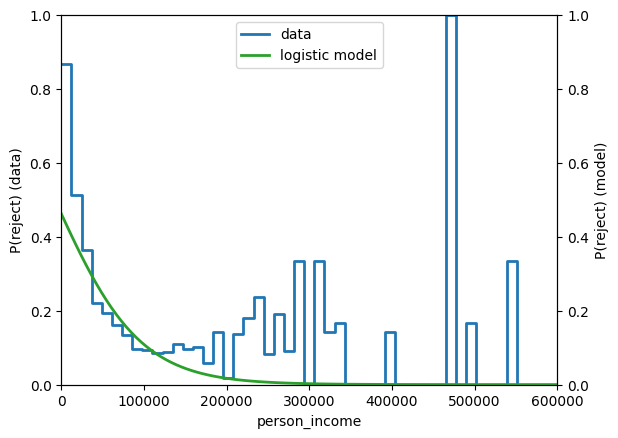

In [43]:
column = 'person_income'

data_accept = data[data['loan_status'] == 0]
data_reject = data[data['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
_min = 0
_max = 6.0e5
print(_min, _max)
_steps = _max - _min
_steps = 50
print(_steps)

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper center')
plt.savefig(f'logistic_{column}.pdf')
None

### Person Employment Length

0 50
50
clf score: 0.7833892148644873


/tmp/ipykernel_1392/599738875.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


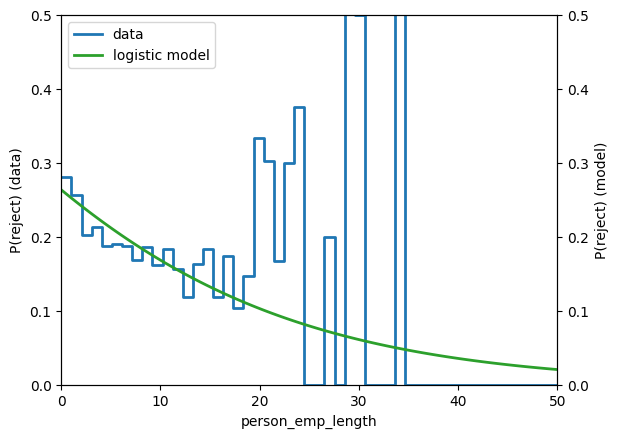

In [44]:
column = 'person_emp_length'

data_accept = data[data['loan_status'] == 0]
data_reject = data[data['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
_min = 0
_max = 50
print(_min, _max)
_steps = _max - _min
_steps = 50
print(_steps)

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 0.5)

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 0.5)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.savefig(f'logistic_{column}.pdf')
None

### Loan Amount

0 40000
40


/tmp/ipykernel_1392/1040369364.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


clf score: 0.7833892148644873


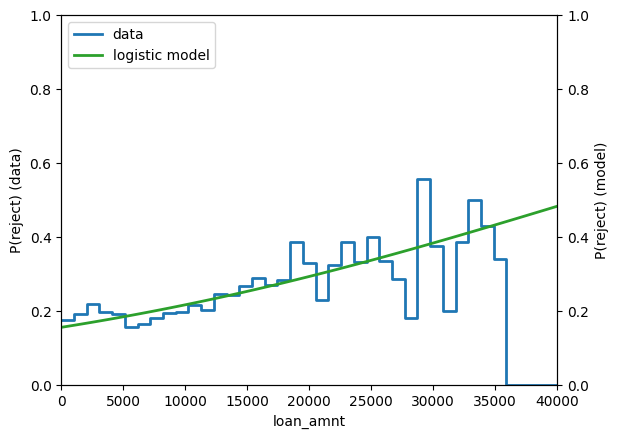

In [45]:
column = 'loan_amnt'

data_accept = data[data['loan_status'] == 0]
data_reject = data[data['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
_min = 0
_max = 40000
print(_min, _max)
_steps = _max - _min
_steps = 40
print(_steps)

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.savefig(f'logistic_{column}.pdf')
None

### Loan Interest Rate

0 25
50


/tmp/ipykernel_1392/2383996881.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


clf score: 0.7969055602123498


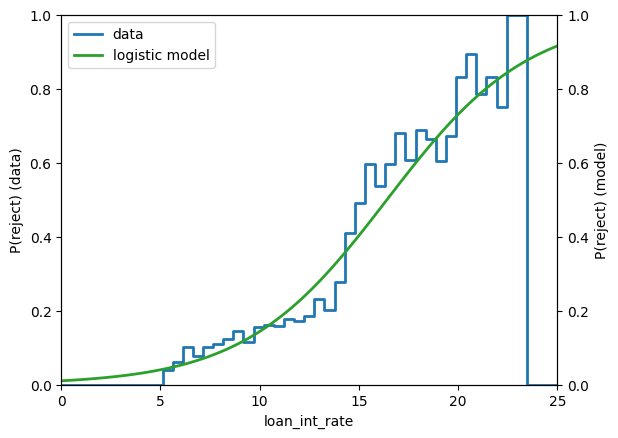

In [46]:
column = 'loan_int_rate'

data_accept = data[data['loan_status'] == 0]
data_reject = data[data['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
_min = 0
_max = 25
print(_min, _max)
_steps = _max - _min
_steps = 50
print(_steps)

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.savefig(f'logistic_{column}.pdf')
None

### Loan Percent Income

0 1
50
clf score: 0.8147177982676725


/tmp/ipykernel_1392/1415725810.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


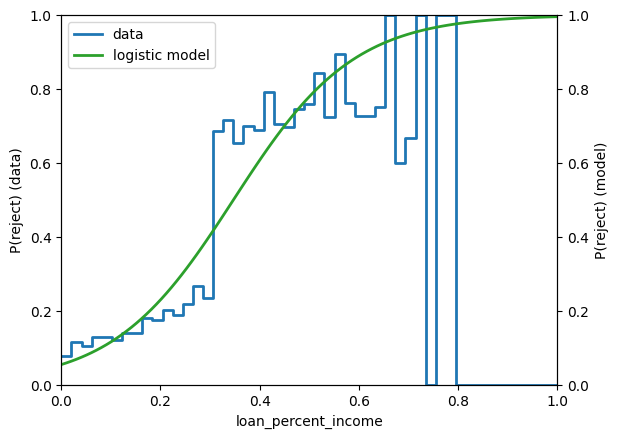

In [47]:
column = 'loan_percent_income'

data_accept = data[data['loan_status'] == 0]
data_reject = data[data['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
_min = 0
_max = 1
print(_min, _max)
_steps = _max - _min
_steps = 50
print(_steps)

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 1.0)

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 1.0)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.savefig(f'logistic_{column}.pdf')
None

### Credit History Length

0 30
50
clf score: 0.7833892148644873


/tmp/ipykernel_1392/1654464240.py:18: RuntimeWarning: invalid value encountered in divide
  h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)


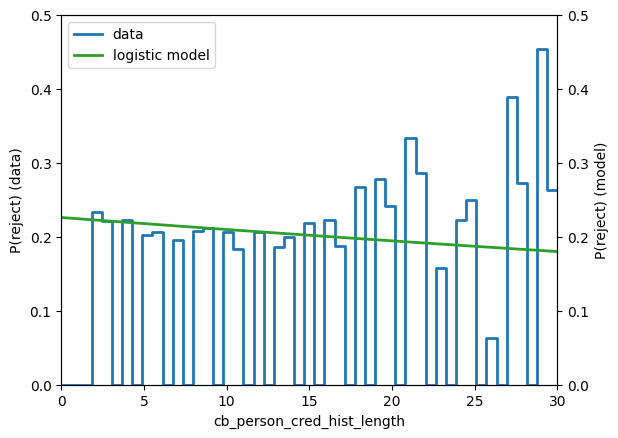

In [48]:
column = 'cb_person_cred_hist_length'

data_accept = data[data['loan_status'] == 0]
data_reject = data[data['loan_status'] == 1]

_min = min(data_accept[column].min(), data_reject[column].min())
_max = max(data_accept[column].max(), data_reject[column].max())
_min = 0
_max = 30
print(_min, _max)
_steps = _max - _min
_steps = 50
print(_steps)

bins = numpy.linspace(_min, _max, _steps)
h_data_accept, bins_accept = numpy.histogram(data_accept[column], bins=bins)
h_data_reject, bins_reject = numpy.histogram(data_reject[column], bins=bins)
h_data_ratio = h_data_reject / (h_data_reject + h_data_accept)
nan_index = numpy.isnan(h_data_ratio)
h_data_ratio[nan_index] = 0.0 #numpy.zeros(shape=h_data_ratio.shape)[nan_index] + numpy.ones(shape=h_data_ratio.shape)[nan_index]

lines1 = plt.step(
    bins_reject,
    numpy.concatenate([ [h_data_ratio[0]], h_data_ratio]),
    label='data',
    color='tab:blue',
    linewidth=2,
)
plt.xlabel(column)
plt.ylabel('P(reject) (data)')
plt.ylim(0.0, 0.5)

x = data[column].to_numpy().reshape(-1, 1)
y = data['loan_status'].to_numpy()

model = sklearn.linear_model.LogisticRegression()
clf = model.fit(x, y)

print(f'clf score: {clf.score(x, y)}')

x_min = _min
x_max = _max
xx = numpy.linspace(x_min, x_max, 100)

plt.twinx()
lines2 = plt.plot(
    xx,
    clf.predict_proba(xx.reshape(-1, 1))[:, 1],
    label='logistic model',
    color='tab:green',
    linewidth=2,
)
plt.ylabel('P(reject) (model)')
plt.xlim(_min, _max)
plt.ylim(0.0, 0.5)
lines = lines1 + lines2
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left')
plt.savefig(f'logistic_{column}.pdf')
None